<a href="https://colab.research.google.com/github/mcairlangga-1/Bangkit-Capstone-Project/blob/main/FinalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

Initial_Model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in Initial_Model.layers:
  layer.trainable = False

Initial_Model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
x = Initial_Model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers. Dense (4, activation='softmax')(x)

model = Model(Initial_Model.input, x)
model.summary()
#model.compile(optimizer = SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Natural Disaster Dataset/Training'
train_datagen = ImageDataGenerator(
    rescale=1./255.,
	  rotation_range=30,
	  zoom_range=0.15,
	  width_shift_range=0.2,
  	height_shift_range=0.2,
  	shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
)

VALIDATION_DIR = '/content/drive/MyDrive/Natural Disaster Dataset/Testing'
validation_datagen = ImageDataGenerator(rescale= 1./255.)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(224, 224)
)


Found 2581 images belonging to 4 classes.
Found 991 images belonging to 4 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
41/41 [==============================] - 1837s 44s/step - loss: 1.2483 - accuracy: 0.4463 - val_loss: 0.9393 - val_accuracy: 0.6811
Epoch 2/100
41/41 [==============================] - 105s 3s/step - loss: 0.9154 - accuracy: 0.6548 - val_loss: 0.8508 - val_accuracy: 0.6539
Epoch 3/100
41/41 [==============================] - 105s 3s/step - loss: 0.7901 - accuracy: 0.7071 - val_loss: 0.7211 - val_accuracy: 0.7760
Epoch 4/100
41/41 [==============================] - 104s 3s/step - loss: 0.7300 - accuracy: 0.7261 - val_loss: 0.7205 - val_accuracy: 0.7437
Epoch 5/100
41/41 [==============================] - 104s 3s/step - loss: 0.6659 - accuracy: 0.7555 - val_loss: 0.6768 - val_accuracy: 0.7598
Epoch 6/100
41/41 [==============================] - 104s 3s/step - loss: 0.6101 - accuracy: 0.7881 - val_loss: 0.6281 - val_accuracy: 0.7992
Epoch 7/100
41/41 [==============================] - 105s 3s/step - loss: 0.6165 - accuracy: 0.7830 - val_loss: 0.6231 - val_accuracy: 0.7982
Epoc

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path=fn
  img=image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)
  print(classes)

Saving 152.jpg to 152.jpg
152.jpg
[[6.3958346e-17 1.5056285e-07 9.9999988e-01 8.6284342e-31]]


Text(0.5, 1.0, 'Training and validation loss')

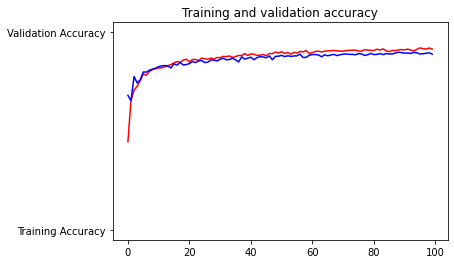

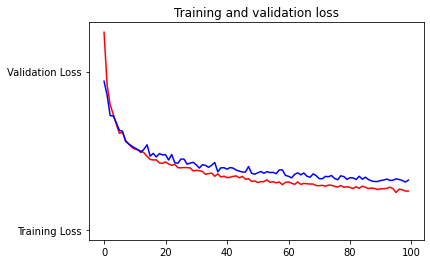

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
tf.keras.models.save_model(
  model, '/content/drive/MyDrive/Bangkit/Disaster_Prediction2'
)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bangkit/Disaster_Prediction2/assets


In [ ]:
model.save('/content/drive/MyDrive/Bangkit/classification_model2.h5')
